In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [25]:
df_invoice = pd.read_csv("C:\\Users\\user\\Desktop\\DATA ANALYSIS\\my projects\\Fruad Detection\\train\\invoice_train.csv")
df_client = pd.read_csv("C:\\Users\\user\\Desktop\\DATA ANALYSIS\\my projects\\Fruad Detection\\train\\client_train.csv")
df_sample_submission = pd.read_csv("C:\\Users\\user\\Desktop\\DATA ANALYSIS\\my projects\\Fruad Detection\\SampleSubmission.csv")
test_invoice = pd.read_csv("C:\\Users\\user\\Desktop\\DATA ANALYSIS\\my projects\\Fruad Detection\\test\\invoice_test.csv")
test_client = pd.read_csv("C:\\Users\\user\\Desktop\\DATA ANALYSIS\\my projects\\Fruad Detection\\test\\client_test.csv")

In [4]:
df_invoice.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [5]:
df_client.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target'],
      dtype='object')

In [38]:
#merge aggregate data with client dataset
df = pd.merge(df_client,df_invoice, on='client_id', how='left')
df_test = pd.merge(test_client,test_invoice, on='client_id', how='left')

In [7]:
df.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [27]:
df_invoice.shape, df_client.shape, df.shape, test.shape

((4476749, 16), (135493, 6), (4476749, 21), (1939730, 20))

In [9]:
df.to_csv("C:/Users/user/Desktop/DATA ANALYSIS/my projects/Fruad Detection/train/Electricty_fraud_sheet.csv", sep=",", index=False)

In [39]:
df1 = df.drop(columns=["disrict", "client_id", "region", "creation_date", "invoice_date",
                       "tarif_type","counter_number", "counter_code","client_catg",
                       "months_number", "counter_statue"])
test = df_test.drop(columns=["disrict", "client_id", "region", "creation_date", "invoice_date",
                       "tarif_type","counter_number", "counter_code","client_catg",
                       "months_number", "counter_statue"])

In [34]:
df1['target'] = df1['target'].astype(int)

In [12]:
df.counter_type.unique()

array(['ELEC', 'GAZ'], dtype=object)

In [13]:
df1["counter_type"] = np.where(df1["counter_type"] == "GAZ", 0, 1)


In [36]:
test["counter_type"] = np.where(test["counter_type"] == "GAZ", 0, 1)

In [14]:
df1.head()

,target,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,counter_type
0,0,8,1,82,0,0,0,14302,14384,1
1,0,6,1,1200,184,0,0,12294,13678,1
2,0,8,1,123,0,0,0,14624,14747,1
3,0,8,1,102,0,0,0,14747,14849,1
4,0,9,1,572,0,0,0,15066,15638,1


In [15]:
X = df1.drop(columns=["target"])
y = df1.target

In [16]:
X.shape, y.shape

((4476749, 9), (4476749,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
model = RandomForestClassifier(random_state=42)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = model.predict(X_test)
preds = pd.DataFrame(y_pred, columns=['target'])
preds.head()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9126442173451723
Confusion Matrix:
 [[813281  11415]
 [ 66799   3855]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95    824696
           1       0.25      0.05      0.09     70654

    accuracy                           0.91    895350
   macro avg       0.59      0.52      0.52    895350
weighted avg       0.87      0.91      0.89    895350



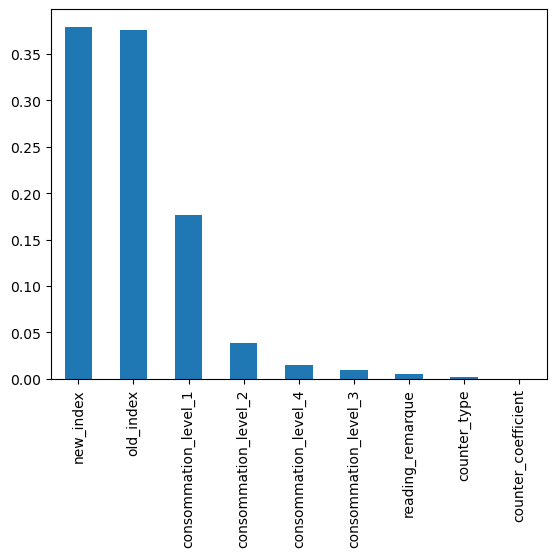

In [21]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [37]:
preds = model.predict(test)
preds = pd.DataFrame(preds, columns=['target'])
preds.head()

,target
0,0
1,0
2,1
3,0
4,0


In [40]:
sub_client_id = df_test['client_id']

In [41]:
submission = pd.DataFrame(
    {
        'client_id': sub_client_id,
        'target': preds['target']
    }
)

submission.head()

,client_id,target
0,test_Client_0,0
1,test_Client_0,0
2,test_Client_0,1
3,test_Client_0,0
4,test_Client_0,0


In [42]:
submission.to_csv('C:\\Users\\user\\Desktop\\DATA ANALYSIS\\my projects\\Fruad Detection\\2ndSubmission.csv', index=False)